# 3-박주홍
## Setting

라이브러리를 로드합니다. 주요 라이브러리로 pandas, numpy, matplotlib와 sklearn을 사용합니다.

In [7]:
# import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Jupyter Notebook 상에서 출력하기 위해 아래 코드를 추가
plt.style.use('ggplot')
%matplotlib inline

## Function
분석에 사용할 함수를 정의합니다. 함수의 역할에 대해서는 아래 한글 주석으로 추가하였습니다.

In [8]:
# 모델의 결과를 평가하는 함수
def calculate_diagnostic_performance (actual_predicted):
    """ We will calculated only accuracy in this model """
    
    performance ={}
    test_correct = actual_predicted[:, 0] == actual_predicted[:, 1]
    performance['accuracy'] = np.average(test_correct)

    return performance

# 모델 결과를 차트로 출력하는 함수
def chart_results(results):
    x = results['c']
    y1 = results['training_accuracy']
    y2 = results['test_accuracy']
    
    # Create figure
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.plot(x,y1, color='k',linestyle='solid', label = 'Training set')
    ax.plot(x,y2, color='b',linestyle='dashed', label = 'Test set')    
    ax.set_xscale('log')
    ax.set_xlabel('Regularisation (c)')
    ax.set_ylabel('Accuracy')
    plt.title('Effect of regularisation on model accuracy')
    plt.legend()
    plt.show()

# 데이터를 로드하는 함수, 주석으로 데이터에 대한 설명이 추가됨
def load_data ():
    """Load the data set. Here we load the Breast Cancer Wisconsin (Diagnostic)
    Data Set. Data could be loaded from other sources though the structure
    should be compatible with thi sdata set, that is an object with the 
    following attribtes:
        .data (holds feature data)
        .feature_names (holds feature titles)
        .target_names (holds outcome classification names)
        .target (holds classification as zero-based number)
        .DESCR (holds text-based description of data set)"""
    
    data_set = datasets.load_breast_cancer()
    return data_set

# 학습을 안정적으로 하기 위해 feature의 scale을 보정하여 normalise하는 코드
# feature들 간의 scale이 다르면 학습이 안정적으로 되지 않으므로 필요
def normalise (X_train,X_test):
    """Normalise X data, so that training set has mean of zero and standard
    deviation of one"""
    
    # Initialise a new scaling object for normalising input data
    sc=StandardScaler() 
    
    # Set up the scaler just on the training set
    sc.fit(X_train)
    
    # Apply the scaler to the training and test sets
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    
    return X_train_std, X_test_std

# 학습 결과를 보기 편하게 출력하는 함수
def print_diagnostic_results (performance):
    """Iterate through, and print, the performance metrics dictionary"""
    
    print('\nMachine learning diagnostic performance measures:')
    print('-------------------------------------------------')
    for key, value in performance.items():
        print (key,'= %0.3f' %value) # print 3 decimal places
    return

# 학습과 평가에 사용하기 위해 데이터를 X, y 로 나누고 이를 Train 및 Test로 나누는 함수
def split_data (data_set, split=0.25):
    """Extract X and y data from data_set object, and split into tarining and
    test data. Split defaults to 75% training, 25% test if not other value 
    passed to function"""
    
    X = data_set.data
    y = data_set.target
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=split)
    
    return X_train,X_test,y_train,y_test

# 모델로 Test를 하는 함수, 입력값에 대한 예측값을 출력함
def test_model(model, X, y):
    """Return predicted y given X (attributes)"""
    
    y_pred = model.predict(X)
    test_results = np.vstack((y, y_pred)).T
    return test_results

# 모델을 Train 하는 함수, 학습된 모델을 출력함
def train_model (X, y, c):
    """Train the model """
    
    from sklearn.svm import SVC
    model=SVC(kernel='rbf',C=c)
    model.fit(X_train_std,y_train)
    return model

## Analysis
실제 분석을 하는 항목입니다. 개별 항목에 대한 한글 주석을 추가하였습니다.

            training_accuracy  test_accuracy           c
c                                                       
0.0001               0.626761       0.629371      0.0001
0.0010               0.629108       0.622378      0.0010
0.0100               0.626761       0.629371      0.0100
0.1000               0.953052       0.944056      0.1000
1.0000               0.985915       0.972028      1.0000
10.0000              0.992958       0.972028     10.0000
100.0000             1.000000       0.965035    100.0000
1000.0000            1.000000       0.965035   1000.0000
10000.0000           1.000000       0.965035  10000.0000


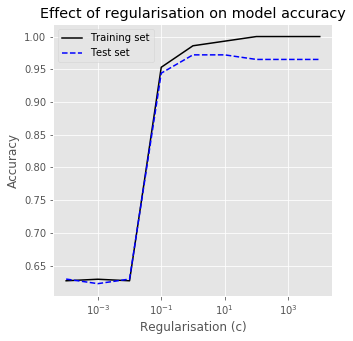

In [9]:
###### Main code #######

# Load data
data_set = load_data()

# Regularisation을 하기 위한 C 값의 후보를 정의함
# List of regularisation values
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
training_accuracy = []
test_accuracy = []
c_results = [] # record c

# 각 Regularisation 중에서 가장 성능이 좋은 C 값을 선택하기 위해 여러번 반복함
for c in c_list:
    for i in range(1000): # repeat model for better estimation of optimal C
        
        # 데이터를 X, y 및 train, test로 나눔
        # Split data into trainign and test sets
        X_train, X_test, y_train, y_test = split_data(data_set, 0.25)

        # 안정적인 학습을 위해 Feature들의 sclae 차이를 보정하는 Normalize 수행
        # Normalise data
        X_train_std, X_test_std = normalise(X_train,X_test)
        
        # 학습에 사용한 c 기록
        # Repeat test 1000x per level of c
        c_results.append(c)
        
        # 모델 학습
        # Train model
        model = train_model(X_train_std,y_train, c)

        # 학습된 결과로 Train 데이터에 대한 평가 진행
        # Produce results for training set
        test_results = test_model(model, X_train_std, y_train)
        performance = calculate_diagnostic_performance(test_results)
        training_accuracy.append(performance['accuracy'])

        # 학습된 결과로 Test 데이터에 대한 평가 진행
        # Produce results for test set
        test_results = test_model(model, X_test_std, y_test)
        performance = calculate_diagnostic_performance(test_results)
        test_accuracy.append(performance['accuracy'])

# 학습 결과를 계산하기 위해 DataFrame을 생성하여 데이터를 가공하고 이를 출력함
results = pd.DataFrame()
results['c'] = c_results
results['training_accuracy'] = training_accuracy
results['test_accuracy'] = test_accuracy
summary = results.groupby('c').median()
summary['c'] = list(summary.index)
print (summary)

# 최종 결과 차트를 출력함
chart_results (summary)